Objective: Train a sentiment classifier on a corpus of the provided documents. Your goal is to maximize accuracy. There is special interest in being able to accurately detect negative sentiment. The training data includes documents from a wide variety of sources, not merely social media, and some of it may be inconsistently labeled. Please describe the business outcomes in your work sample including how data limitations impact your results and how these limitations could be addressed in a larger project.

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from data_prep import (X_train_scale, y_train,
                       X_test_scale, y_test,
                       train_vectors, test_vectors)
from stopwords import STOPWORDS

In [3]:
train_vectors

<15171x27271 sparse matrix of type '<class 'numpy.int64'>'
	with 176965 stored elements in Compressed Sparse Row format>

In [4]:
X_train_scale

array([[1.05328935, 1.31966107, 1.46151912, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.67711458, 0.84835354, 0.58460765, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.30093981, 0.37704602, 0.29230382, ..., 0.        , 0.        ,
        0.        ],
       [3.0846331 , 3.20489116, 3.50764589, ..., 0.        , 0.        ,
        0.        ],
       [0.9780544 , 1.13113806, 0.87691147, ..., 0.        , 0.        ,
        0.        ]])

In [6]:
# X_resampled

In [7]:
# y_resampled

In [11]:
# pd.DataFrame(y_resampled)[0].value_counts()

In [12]:
pd.DataFrame(y_train)[0].value_counts()

1    6696
2    4510
0    3965
Name: 0, dtype: int64

In [13]:
clf = RandomForestClassifier(max_depth=2, random_state=0)

In [14]:
clf.fit(X_train_scale, y_train)

/Users/stevedye/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

Confusion Matrix
[[   0 1321    1]
 [   0 2231    1]
 [   0 1494    9]]


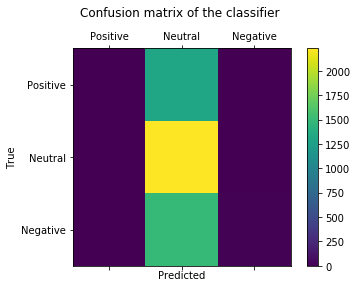

Accuracy is 0.4429503658295432 


In [15]:
y_pred = clf.predict(X_test_scale)
cm = confusion_matrix(y_test , y_pred)
print("Confusion Matrix")
print(cm)
labels=['Positive','Neutral','Negative']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier \n')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
print('Accuracy is {} '.format(accuracy_score(y_test, y_pred)))

In [16]:
scores = cross_val_score(clf, X_train_scale, y_train, cv=5, scoring="accuracy")

In [17]:
scores

array([0.44777595, 0.44528675, 0.44330916, 0.44363876, 0.44166117])

Data limitations:

-- Lack of full stopwords list

Submit your work sample as a single pdf or html file that is comprehensive with respect to your thought process, code, findings, and recommendations (ie a notebook). You may submit other documents if you wish, but compressed files will not be accepted.